In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))

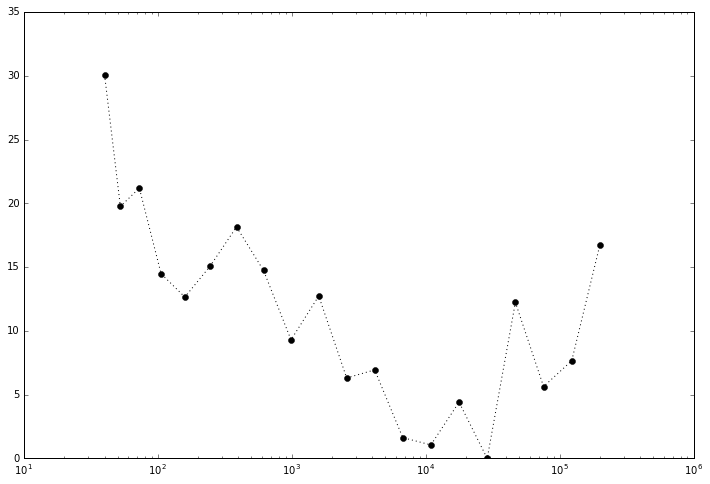

In [15]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-23-17\MNP 11-3-C 15mW scan 5 multi T1 x171 y142 T1 7200 sec *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-23-17\MNP 11-3-C 15mW scan 5 multi T1 x171 y142 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
#opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
#plt.semilogx(t,T1Fit(t,*opt0),'b-')
#print opt0
plt.semilogx(time,T0,'ko:')

[  1.10374659e+03   2.98013571e-02   8.00765225e+01   4.08171645e-02
   3.80946819e+03]


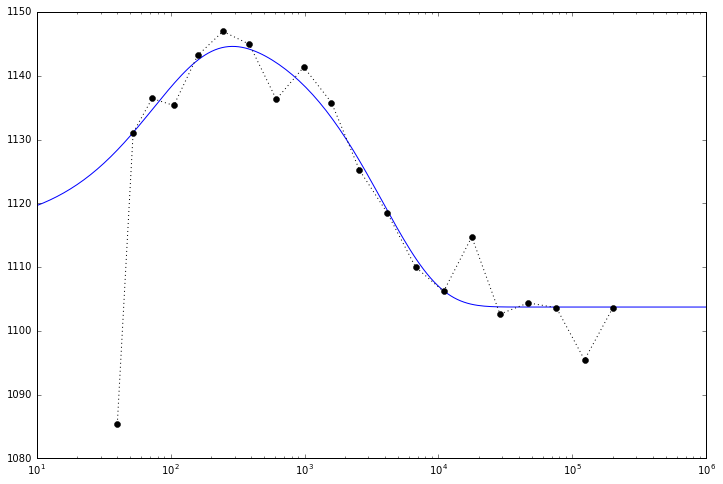

In [75]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-23-17\MNP 11-3-C 15mW scan 5 multi T1 x105 y132 T1 7200 sec *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-23-17\MNP 11-3-C 15mW scan 5 multi T1 x105 y132 T1 7200 sec  Pulse Seq')
time = time+20
#T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

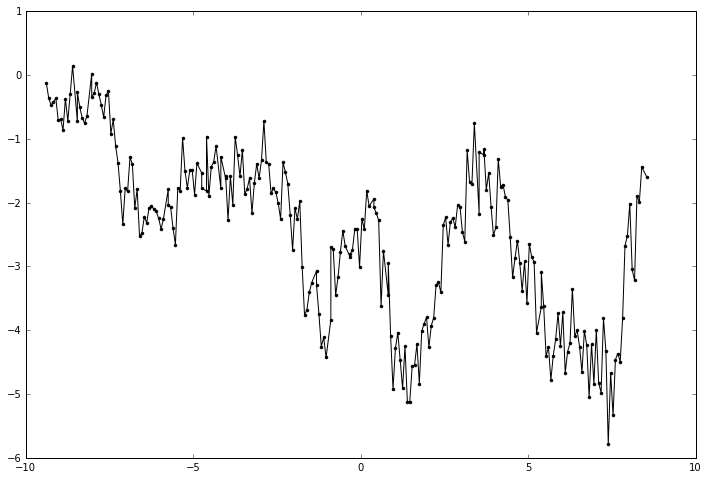

In [31]:
odmr = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 7mW scan 4 x112 y153 B0')
plt.plot((odmr[1:,0]-2.865E9)/28E6,odmr[1:,1],'k.-')

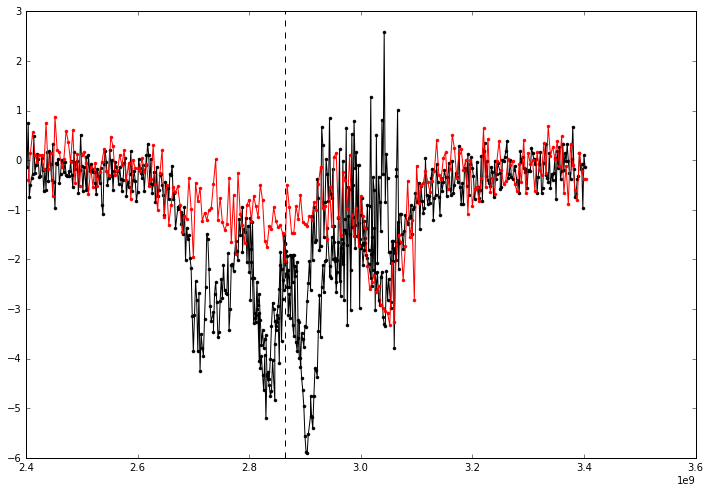

In [65]:
odmr2 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 7mW scan 4 x112 y153 B0 ODMR 2')
odmr3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 7mW scan 4 x112 y153 B0 ODMR 3')
odmr4 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 2')

plt.plot(odmr2[1:,0],odmr2[1:,1],'k.-')
plt.plot(odmr3[1:,0],odmr3[1:,1],'k.-')
plt.plot(odmr4[1:,0],odmr4[1:,1],'r.-')
plt.plot([2.865E9,2.865E9],[-6,3],'k--')

[ -2.31463882e+01  -1.78938578e-03  -9.51822903e+02   1.44190557e+08
   2.93754017e+03]


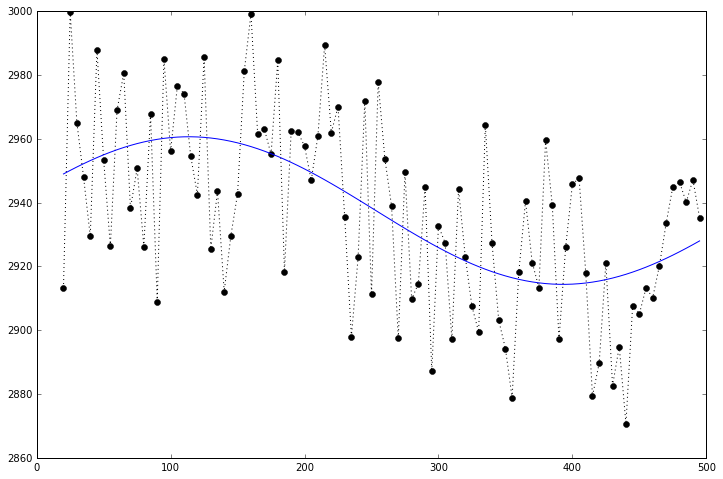

In [34]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 7mW scan 4 x112 y153 B0 ODMR 3 f2.9GHz Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 7mW scan 4 x112 y153 B0 ODMR 3 f2.9GHz Rabi Pulse Sequence')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

In [35]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"

Loading BokehJS ...

In [36]:
import pandas as pd
import glob
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t0 *V.txt')
output_file("1-25-16 MNP 11-3-C Dot 1 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2.5,len(files))*(11.5/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

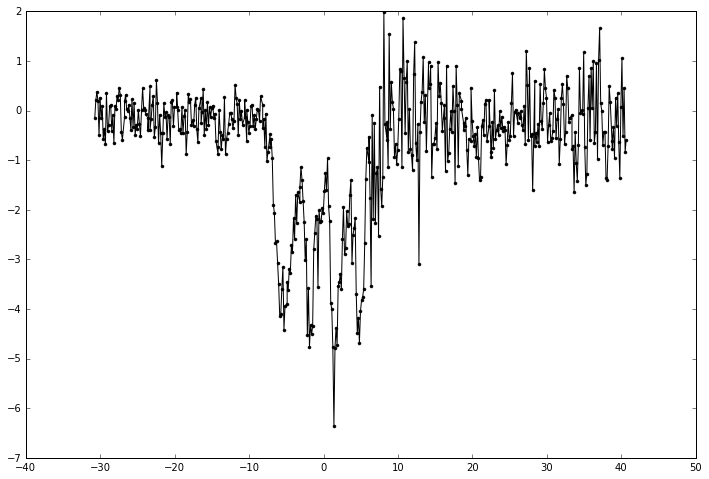

In [64]:
plt.plot((bsweep[:,0]-2.865E9)/28E6,diffs[:,0],'k.-')
#plt.plot(bsweep[:,0],diffs[:,5],'b.-')
#plt.xlim([2.4E9,3.4E9])

[ -1.40750741e+01   1.03595188e-01  -8.99832450e+01   3.58535306e+02
   3.14228255e+03]


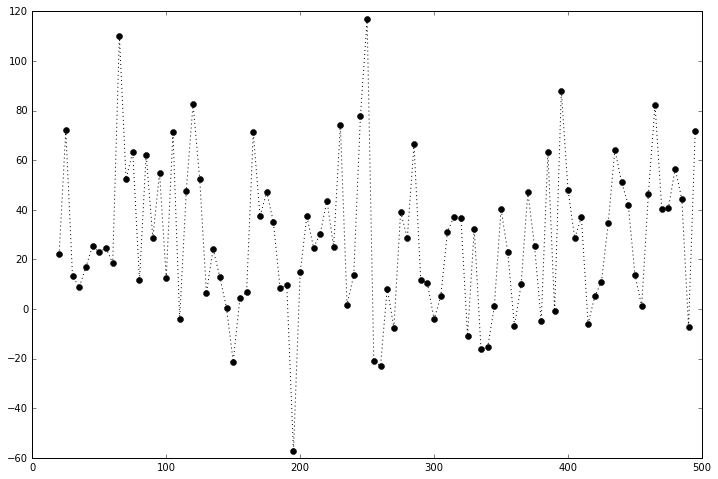

In [68]:
time,rabi0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 3 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 3 Rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#pt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
#lt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

[  1.17095811e+02   9.83850502e-01   1.20866671e+02  -2.16266885e-01
   7.00277256e+03]


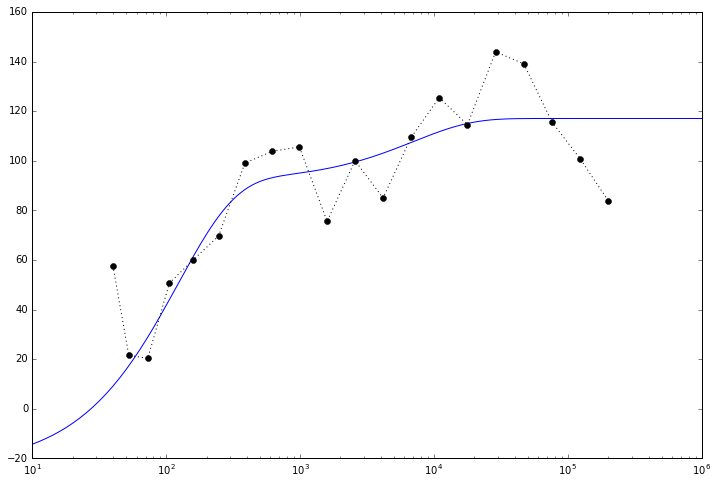

In [71]:
time,T0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 3 T1 *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 3 T1 Pulse Seq')
time = time+20
#T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[  17.63157202    2.74670644  119.58825107    0.92093109  634.09752951]


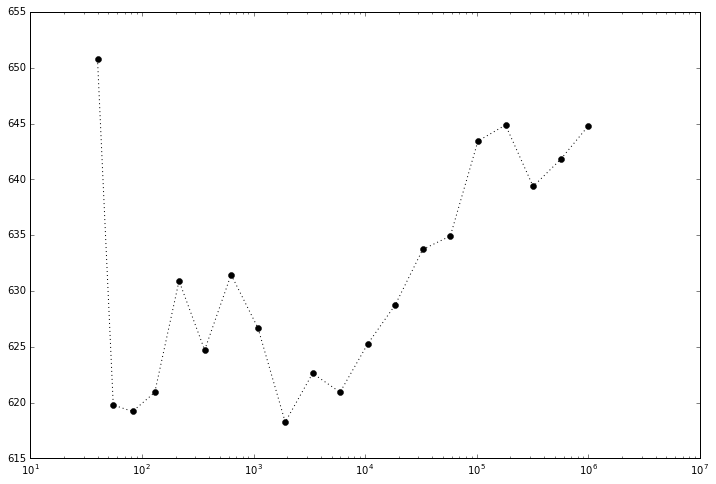

In [75]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 3 T1 scan 2 *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-25-17\MNP 11-3-C 10mW scan 4 x115 y163 t90 B0V next day 3 T1 Pulse Seq')
time = time+20
#T0 = T0 - np.min(T0)
#opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
#plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[  17.63157202    2.74670644  119.58825107    0.92093109  634.09752951]


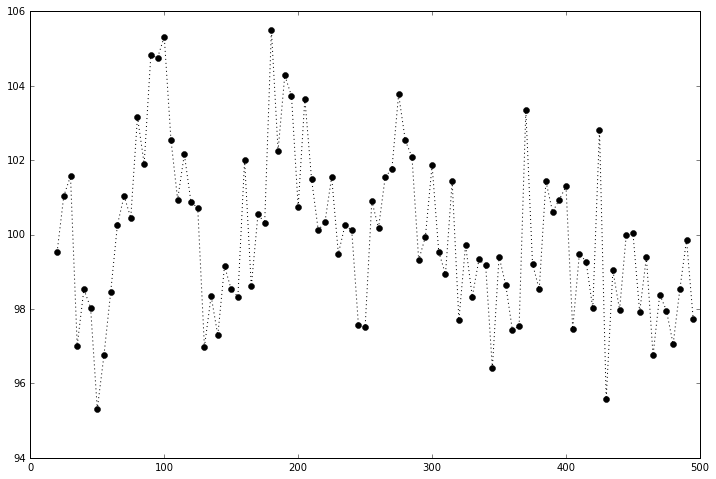

In [78]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 7mW scan 3 x193 y129 B0 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 7mW scan 3 x193 y129 B0 Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
#pt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
#lt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

Phi: 117.901580 +/- 0.752217
Theta: 53.036707 or +/- 0.717800
Phi(naive): 116.292000
Theta(naive): 59.384918


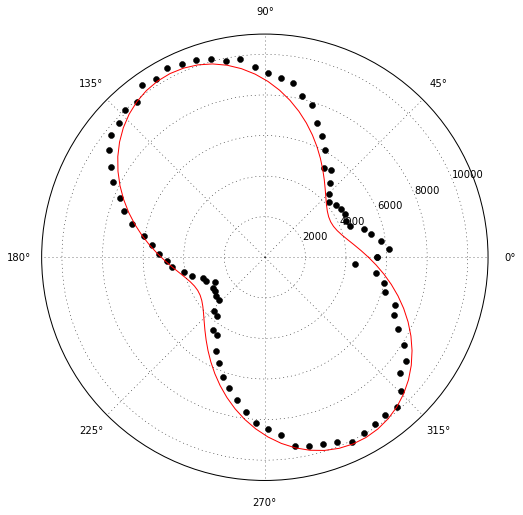

In [80]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 5mW scan 3 x193 y129 B0 rotor sweep')
T1[:,1] -= 2071
OrientPol(T1,False)

[  4.23126943e+00   7.09388247e-03   3.95496310e-02   5.65270847e+02
   1.00197393e+02]


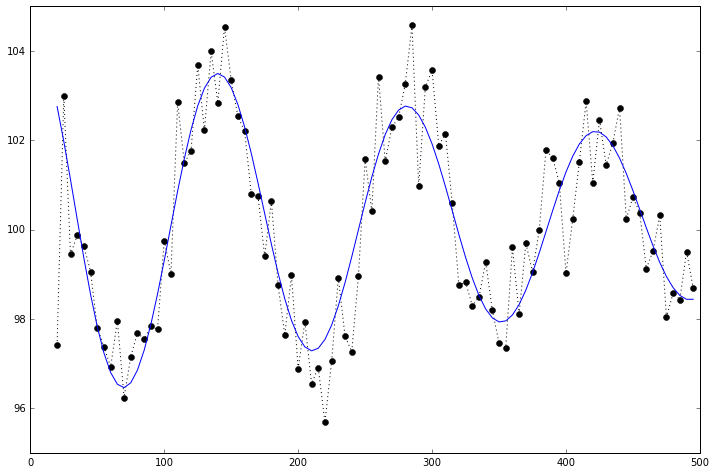

In [90]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 15mW scan 3 x195 y131 B0 T117 d4.6 th59 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 15mW scan 3 x195 y131 B0 T117 d4.6 th59 rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(10,4E-3,0,10,100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

[ -7.86173144e+03   1.68004750e+07   7.85963283e+03]
(-0.97525510204081634, nan, -5.5053943079724972)


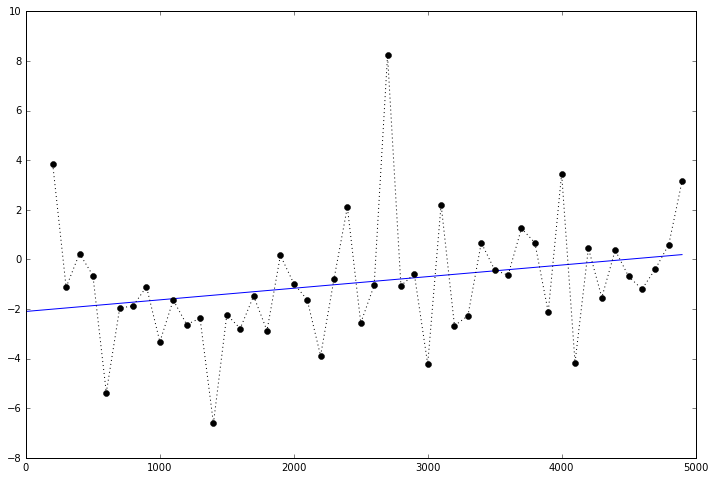

In [68]:
def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn1 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 15mW scan 3 x195 y131 B0 T117 d4.6 th59 2 hahn *[3-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-27-17\MNP 11-3-C 15mW scan 3 x195 y131 B0 T117 d4.6 th59 2 hahn Pulse Seq')
#hahn0 = hahn0-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(10000,1600,-np.min(hahn1)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn1[1:],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[  8.21848072e+00   4.75890367e+00   3.76358111e+02   1.12117989e+01
   6.10681030e+03]


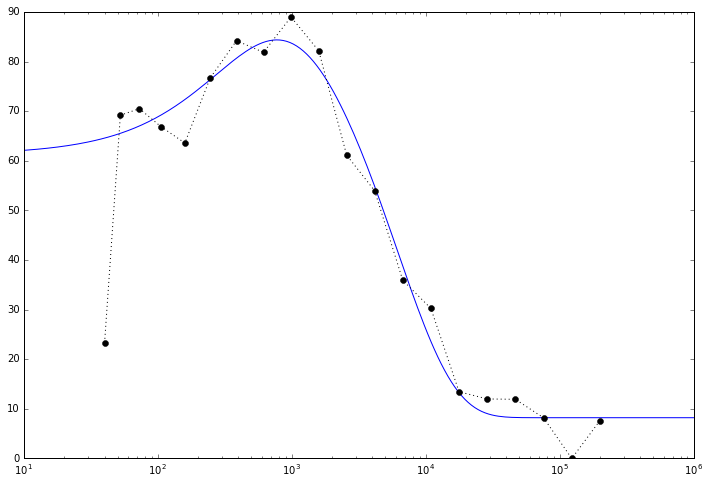

In [76]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 15mW scan 1 x170 y99 T1  *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 15mW scan 1 x170 y99 T1 Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[  32.42180712  239.32364083  749.53390036  238.07748339  754.40259995]


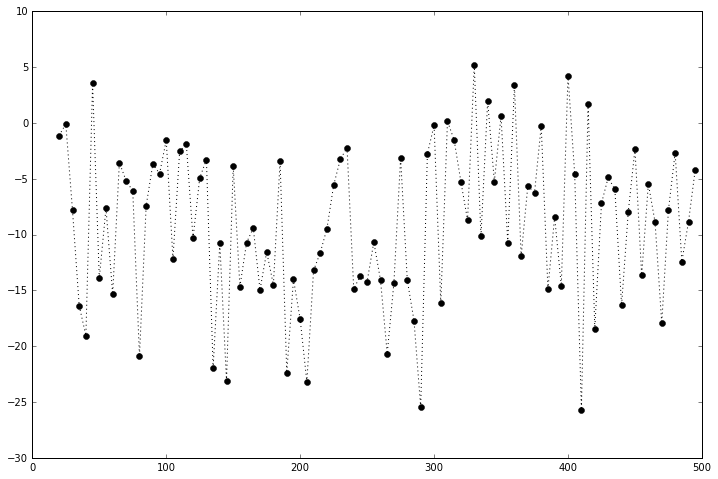

In [12]:
time,rabi0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 B0V rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 B0V rabi pulse seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
#plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

Phi: 98.665832 +/- 0.944692
Theta: 36.140426 or +/- 0.569826
Phi(naive): 92.022000
Theta(naive): 40.252172


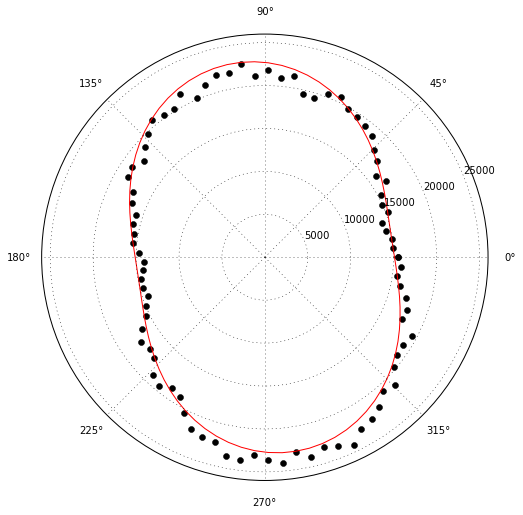

In [15]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 rotor sweep 2')
T1[:,1] -= 1670
OrientPol(T1,False)

[  32.42180712  239.32364083  749.53390036  238.07748339  754.40259995]


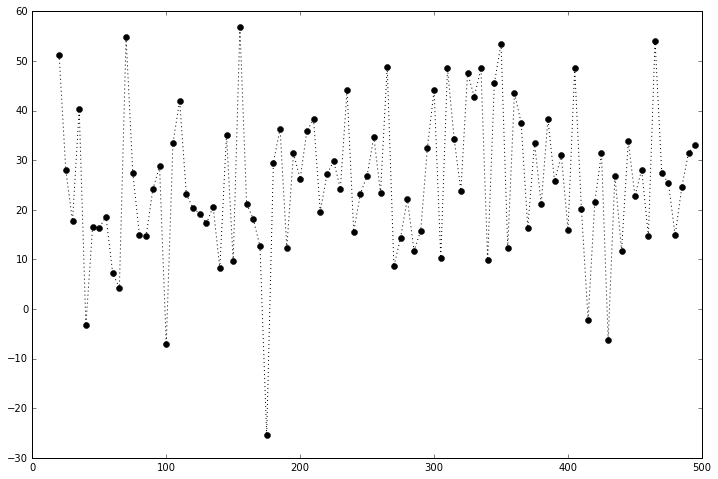

In [23]:
time,rabi0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 B0.5V T98 th36 d8.2 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 B0.5V T98 th36 d8.2 rabi pulse seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
#plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

In [28]:
print np.std(rabi0)
np.sqrt(850*4)/4

14.8716457086


14.577379737113251

[  8.48543177e+02   7.83713561e-02   8.44473661e+04   2.58096765e-02
   6.17519803e+02]


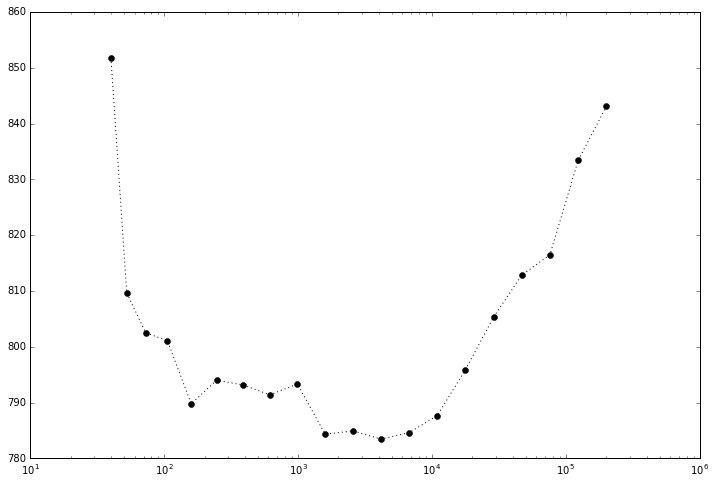

In [77]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T1 *[2-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T1 Pulse Seq')
time = time+20
#T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
#plt.plot(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

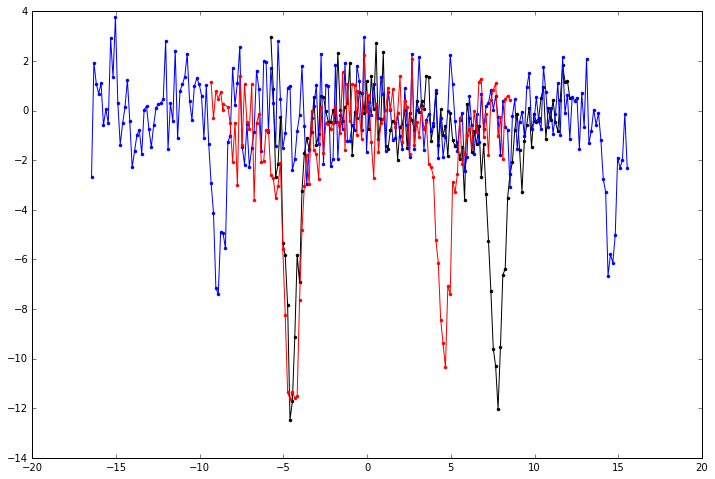

In [51]:
def b(f):
    return (f-2.865E9)/28E6

odmr2 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V')
odmr3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B1V 3')
odmr4 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V after')

plt.plot(b(odmr2[1:,0]),odmr2[1:,1],'k.-')
plt.plot(b(odmr3[1:,0]),odmr3[1:,1],'b.-')
plt.plot(b(odmr4[1:,0]),odmr4[1:,1],'r.-')
#plt.plot([2.865E9,2.865E9],[-14,4],'k--')

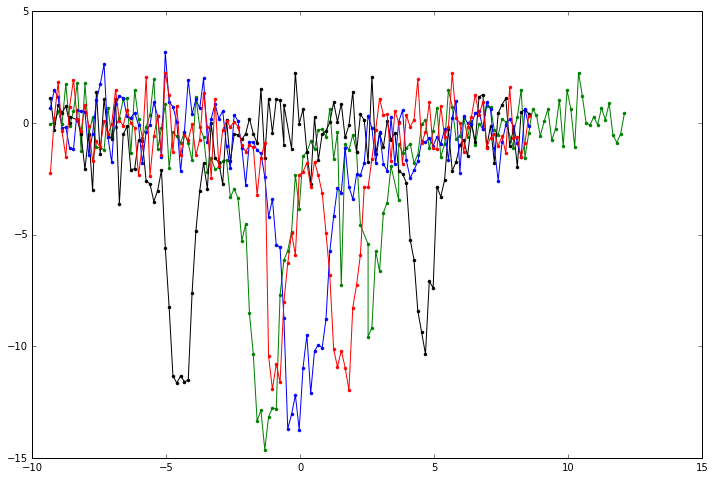

In [53]:
odmr1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th36 d8.2 ODMR 2 B0V')
odmr2 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V after')
odmr3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V after 2')
odmr4 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V after 3')

plt.plot(b(odmr1[1:,0]),odmr1[1:,1],'g.-')
plt.plot(b(odmr2[1:,0]),odmr2[1:,1],'k.-')
plt.plot(b(odmr3[1:,0]),odmr3[1:,1],'b.-')
plt.plot(b(odmr4[1:,0]),odmr4[1:,1],'r.-')
#plt.plot([2.865E9,2.865E9],[-14,4],'k--')

[  3.80283837e+01  -3.44215633e-01   9.48798741e+02  -1.09329063e+00
   5.33347326e+04]


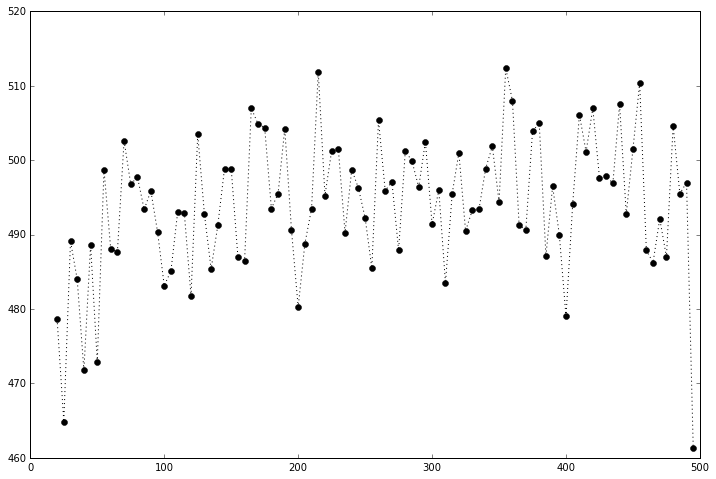

In [55]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V 2 rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V 2 rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
#plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

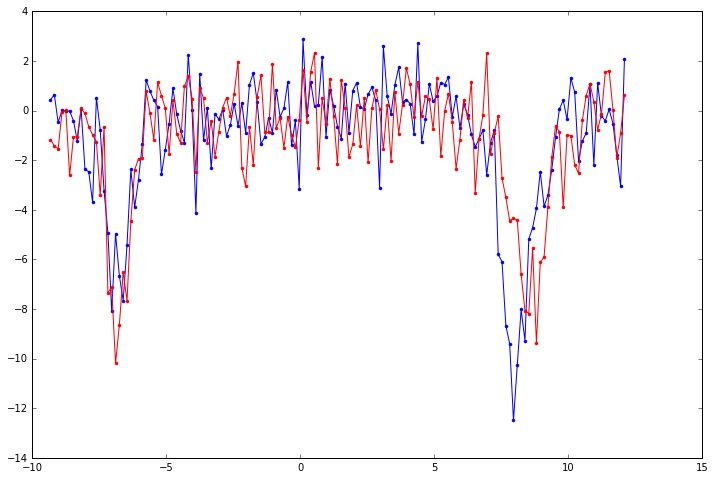

In [57]:
odmr3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V 2')
odmr4 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V 3')

plt.plot(b(odmr3[1:,0]),odmr3[1:,1],'b.-')
plt.plot(b(odmr4[1:,0]),odmr4[1:,1],'r.-')

[  8.48543177e+02   7.83713561e-02   8.44473661e+04   2.58096765e-02
   6.17519803e+02]


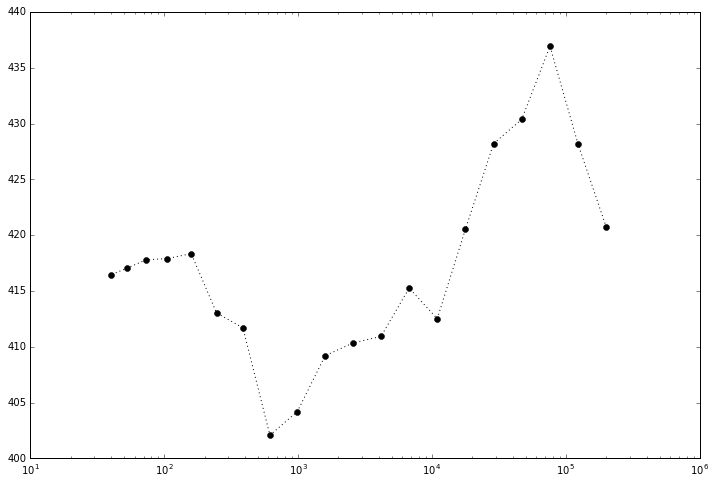

In [78]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V 2 T1 *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0.5V 2 T1 Pulse Seq')
time = time+20
#T0 = T0 - np.min(T0)
#opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
#plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[  3.80283837e+01  -3.44215633e-01   9.48798741e+02  -1.09329063e+00
   5.33347326e+04]


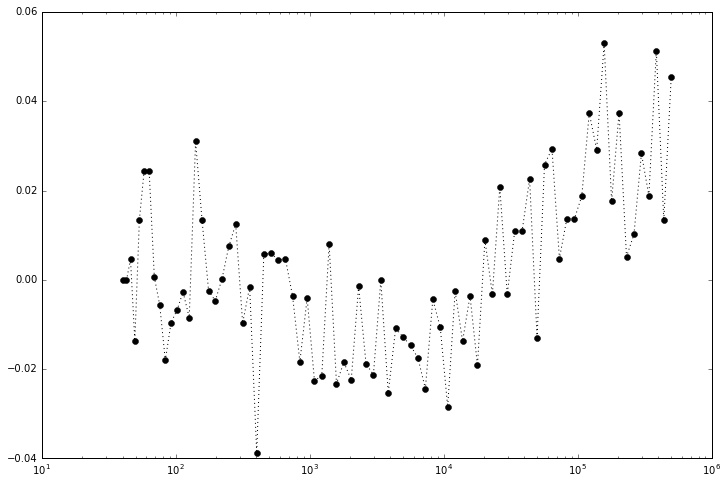

In [71]:
def EPR(EPRfiles,Pfiles):
    files = glob.glob(EPRfiles)
    pseq = np.loadtxt(Pfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = (epr[:,0]-epr[:,1])
        diff[np.isinf(diff)] = 0
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0]- (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.mean(diff,axis=1)
        
    return pseq,d_sum/len(files)

time,T0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 4 T1 *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 2mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 4 T1 Pulse Seq')
time = time+20
#T0 = T0 - np.min(T0)
#opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
#plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0/400,'ko:')

In [65]:
T0

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan])

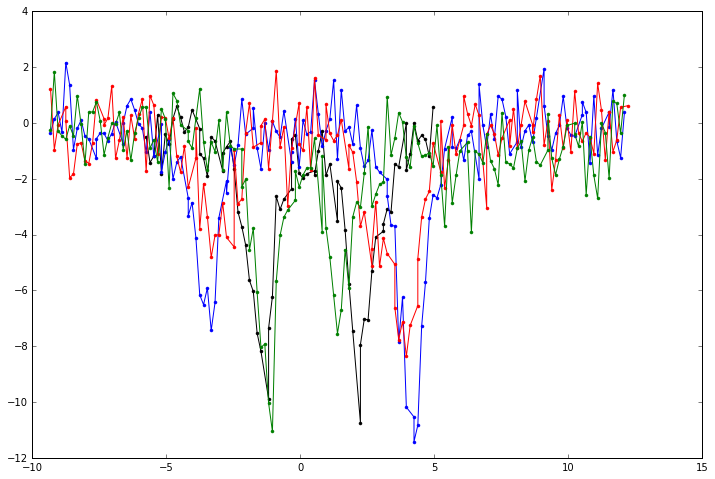

In [73]:
odmr2 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 4')
odmr3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 5')
odmr4 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 6')
odmr5 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 8')


plt.plot(b(odmr2[1:,0]),odmr2[1:,1],'k.-')
plt.plot(b(odmr3[1:,0]),odmr3[1:,1],'b.-')
plt.plot(b(odmr4[1:,0]),odmr4[1:,1],'r.-')
plt.plot(b(odmr5[1:,0]),odmr5[1:,1],'g.-')

(16000, 26000)

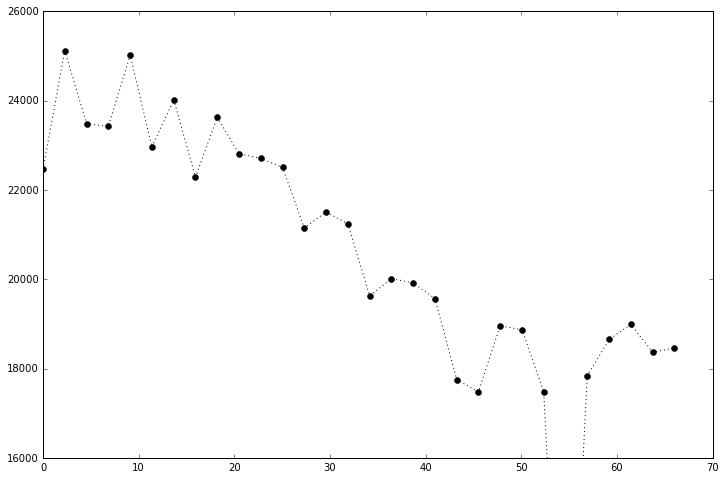

In [8]:
bpl = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 10mW scan 6 x56 y108 B sweep PL')
plt.plot(bpl[:,0]*22,bpl[:,1],'ko:')
plt.ylim([16000,26000])

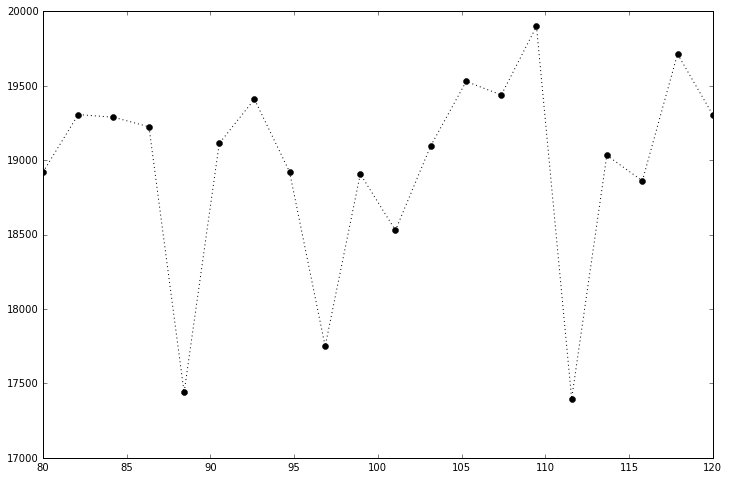

In [10]:
bpl = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 10mW scan 6 x56 y108 theta sweep PL')
plt.plot(bpl[:,0],bpl[:,4],'ko:')


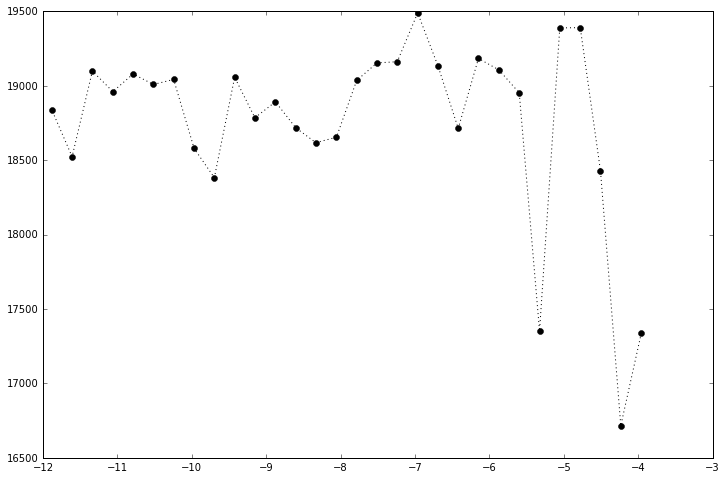

In [11]:
bpl = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 10mW scan 6 x56 y108 theta sweep PL')
plt.plot(bpl[:,2],bpl[:,4],'ko:')


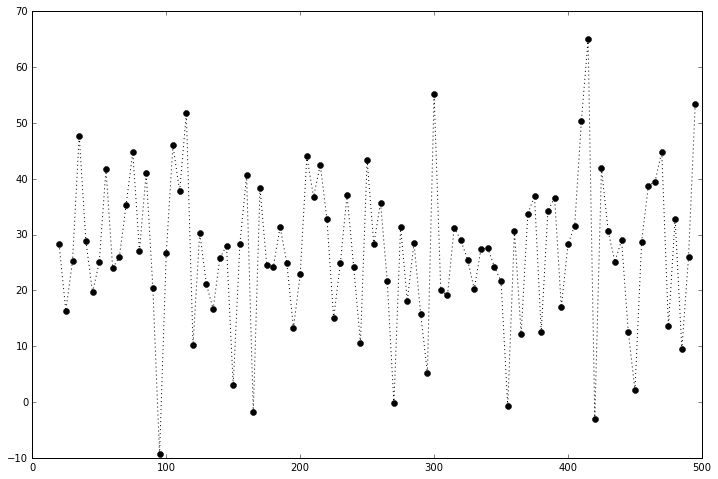

In [13]:
time,rabi0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 ODMR  B1V rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 ODMR  B1V rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
#opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
#plt.plot(time,RabiFit(time,*opt0),'b-')
#print opt0

[   4.03736216   37.66388317  273.24302582   43.28784522  582.81281764]


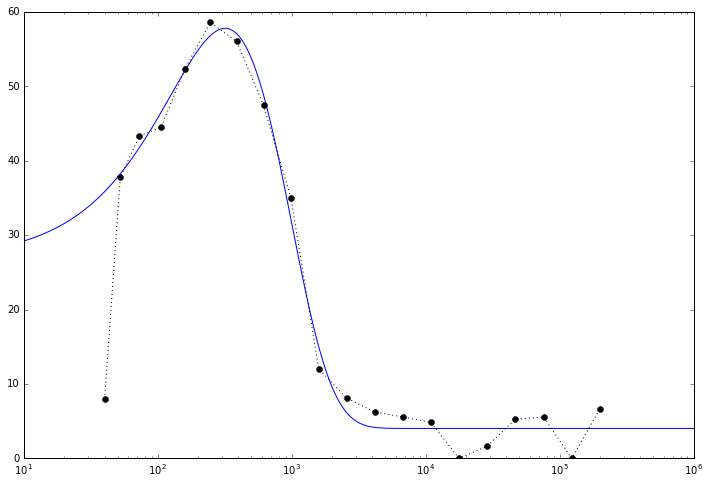

In [20]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  x50 y108 7200 sec 0.000000 V *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  x50 y108 7200 sec 0.000000 V   Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[    6.10743143  2841.30053915   500.38156765  2844.36382848   503.89009907]


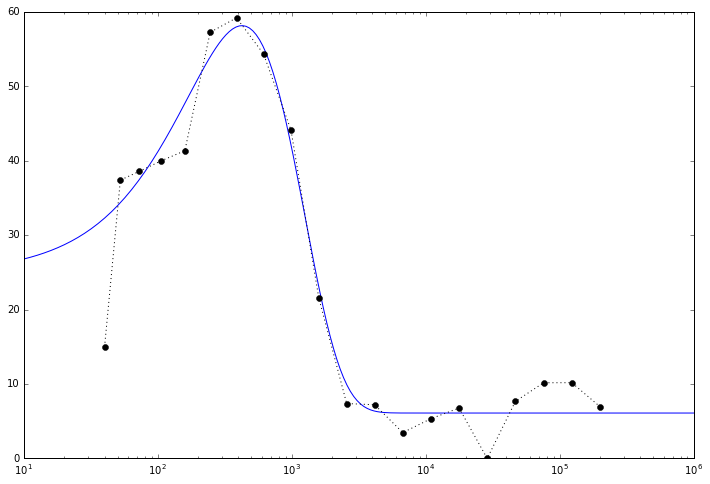

In [21]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  x49 y108 7200 sec 0.222222 V *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  x50 y108 7200 sec 0.000000 V   Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[   4.28745035   13.18699407  172.77359804   18.94064703  915.46340989]


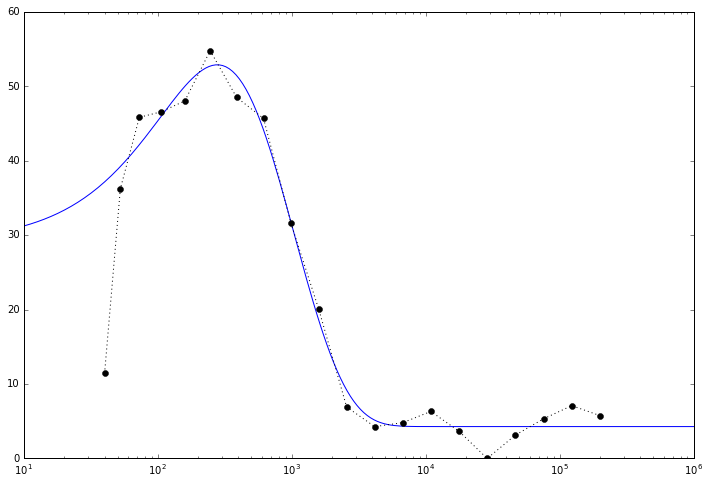

In [22]:
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  x49 y107 7200 sec 0.444444 V *[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  x50 y108 7200 sec 0.000000 V   Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

In [48]:
import glob
import re
import numpy as np
def BatchT1(base):
    files = glob.glob(base+'*')
    regex = re.compile(re.escape(base)+'(x\d+ y\d+ \d+) sec (\d+\.\d+) V   \d+')
    batches = sorted(list(set([(m.group(1),m.group(2)) for f in files for m in [regex.search(f)] if m])), key=lambda x: x[1])
    fits = np.zeros((len(batches),11))
    p_0=(15,15E-3,0,2000,100)
    bound = ([0,1E-4,-200,100,80],[1000,1E-1,200,5E4,150])
    for i,e in enumerate(batches):
        time,T0 = EPR_NoRef(base+e[0]+' sec '+e[1]+' V *[0-9]',base+e[0]+' sec '+e[1]+' V   Pulse Seq')
        time = time+20
        T0 = T0 - np.min(T0)
        try:
            opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
            err = np.sqrt(np.diag(cov0))
        except Exception as exc:
            print "could not fit "+e[1]
            print exc
            opt = [0]*5
            err = [0]*5

        fits[i,0] = e[1]
        fits[i,1:6] = opt0
        fits[i,6:12] = err

        plt.semilogx(time[1:],T0[1:],'o:',color=plt.cm.nipy_spectral(i/float(len(batches))))
        t = np.logspace(1,6,200)
        plt.xlim([np.min(time),np.max(time)])
        plt.semilogx(t,T1Fit(t,*opt0),'-',lw=3,color=plt.cm.nipy_spectral(i/float(len(batches))))
        #plt.savefig(base+e[0]+' sec '+e[1]+' V no fit.png')
        #plt.clf()
        
    return fits

C:\Users\Ouyang Group\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in sqrt


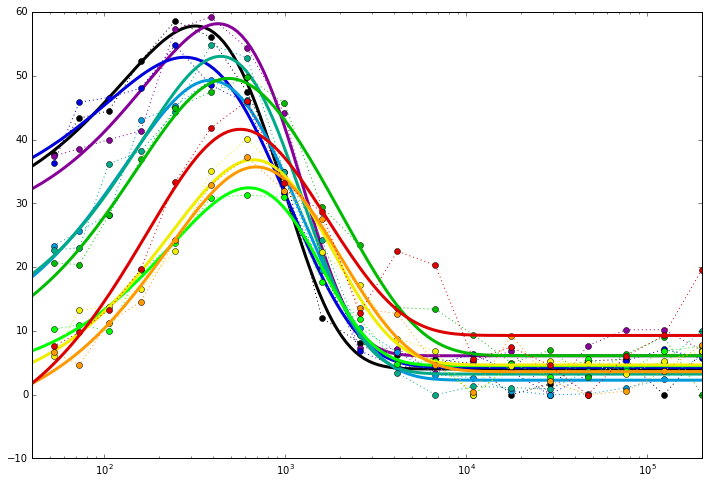

In [49]:
fT1 = BatchT1(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 T1 b sweep  ')


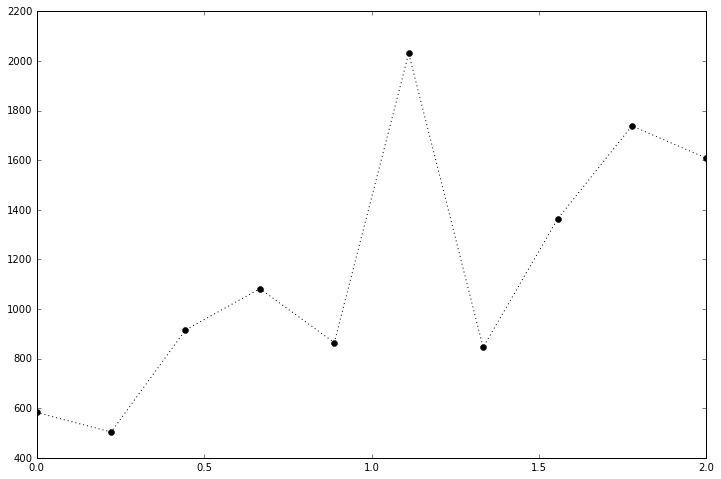

In [51]:
plt.plot(fT1[:,0],fT1[:,5],'ko:')


In [52]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "save,box_zoom,box_select,crosshair,hover,resize,reset"
import pandas as pd
import glob

Loading BokehJS ...

In [61]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 bsweep ODMR  *V.txt')
output_file("MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 bsweep ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,1.05,len(files))*(11/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
show(p)

(2600000000.0, 3200000000.0)

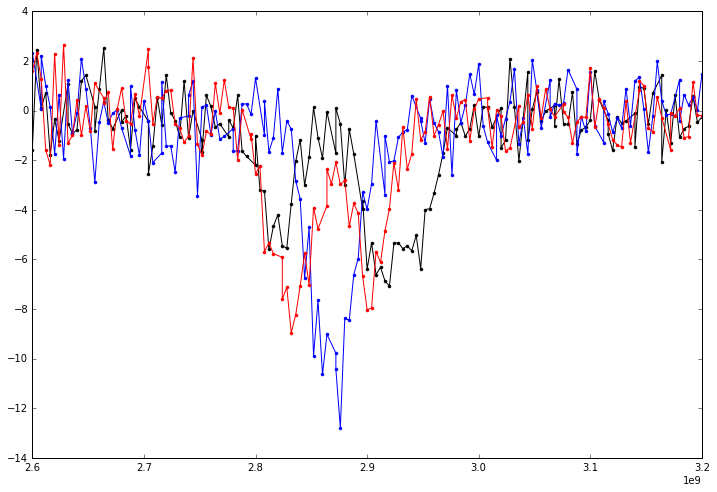

In [60]:
odmr2 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 bsweep ODMR  0.000000 V.txt')
odmr3 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 bsweep ODMR  0.105263 V.txt')
odmr4 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 5 x61 y99 T98 th-36 d-8.2 bsweep ODMR  0.210526 V.txt')
#odmr5 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\1-30-17\MNP 11-3-C 12mW scan 3 x61 y99 T98 th-36 d-8.2 ODMR 2 B0V 8')


plt.plot(odmr2[1:,0],odmr2[1:,1],'k.-')
plt.plot(odmr3[1:,0],odmr3[1:,1],'b.-')
plt.plot(odmr4[1:,0],odmr4[1:,1],'r.-')
#plt.plot(b(odmr5[1:,0]),odmr5[1:,1],'g.-')
plt.xlim([2.6E9,3.2E9])